---
#  --------- **Lab Report 03** -----------
> ## **Name   : Muhammad Ehtisham Saleem**
> ## **Reg No : B22F1242AI108**
> ## **Lab : Digital Image Processing**
 >## **Submitted To : Rizwan Shah**
>## **Course Instructor : Dr. Abdul Jalil**
---

---



# **image processing tasks for detection and segmentation**
## **Introduction:**

> In this lab, I will explore essential image processing techniques such as grayscale conversion, thresholding, edge detection, image blending, logical operations, and image subtraction. These techniques are widely applied in diverse fields such as traffic sign detection, remote sensing, surveillance systems, and medical imaging. The lab consists of three distinct scenarios that reinforce key image processing concepts through practical examples.





---





# **Importing Required Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## **Explanation**
* Imports OpenCV for image processing, Matplotlib for visualization, and cv2_imshow to display images in Google Colab.
* Ensures compatibility for image loading, processing, and displaying within Google Colab.

> # **Scenario no 01 : Traffic Sign Detection**

In this scenario, I work on an intelligent transportation system designed to detect traffic signs on the road. The task involves processing images of traffic signs by applying several image processing techniques such as grayscale conversion, thresholding, edge detection, and logical operations to clean the image and remove noise. These steps help in accurately detecting traffic signs for automated systems.



## **Load the traffic light image**

Original Image:


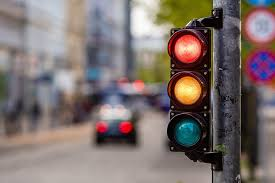

In [ ]:
image_path = 'traffic light.jpeg'
image = cv2.imread(image_path)
print("Original Image:")
cv2_imshow(image)

## **Explanation**
* Loads the image "traffic light.jpeg" using OpenCV’s cv2.imread() function.
* Displays the original image in Google Colab using cv2_imshow().

> ## **1. Convert the Traffic Sign Image to Grayscale:**

Grayscale conversion reduces the complexity of the image by eliminating color, allowing me to focus on the intensity of the pixels. This is the first step in processing, as it simplifies the image while preserving important features.

Grayscale Image:


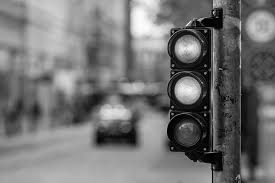

In [ ]:
image_path = "traffic light.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Grayscale Image:")
cv2_imshow(gray)

## **Explanation**
* Reads the image and converts it to grayscale using cv2.cvtColor().
* Displays the grayscale image using cv2_imshow().

> ## **2. Apply Thresholding to Segment the Sign:**

Thresholding is a technique used to segment the image into binary regions (objects vs. background). In this case, I apply a binary threshold to identify the traffic sign based on intensity values.


Thresholded Image:


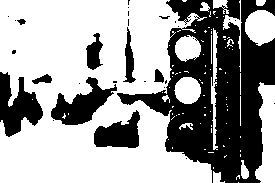

In [ ]:
# Apply Thresholding
_, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY) #binary
print("Thresholded Image:")
cv2_imshow(threshold)

## **Explanation:**
 * A threshold value of 128 is used to convert pixel values above this threshold to white (255) and below to black (0), helping to isolate the traffic sign from the background.
 * Applies binary thresholding using cv2.threshold(), converting pixel values above 100 to 255 and below to 0.


>## **3. Edge Detection to Highlight the Boundaries of the Sign:**

Edge detection highlights the boundaries of objects in an image. The Canny edge detector is widely used for this purpose as it efficiently detects edges while minimizing noise.



Edge Detection (Canny):


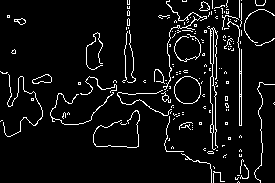

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(threshold, 50, 150)
print("Edge Detection (Canny):")
cv2_imshow(edges)


> ## **4. Apply Logical Operations to Remove Noise and Extract Meaningful Information:**

Morphological operations like closing (dilation followed by erosion) can be used to remove small noise particles, helping to refine the image and highlight the actual traffic sign.

Processed (Noise Removed):


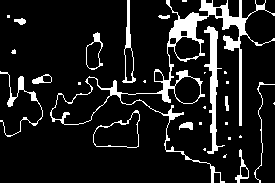

In [ ]:
kernel = np.ones((5,5), np.uint8)
processed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
print("Processed (Noise Removed):")#spot
cv2_imshow(processed)


## **Explanation**
* Applies binary thresholding using cv2.threshold(), converting pixel values above 100 to 255 and below to 0.
* The morphological closing operation smoothens the boundaries of the object and eliminates small gaps or noise in the edges, making the sign more prominent.





---



---



> # **Scenario No 02: Satellite Imaging**
## **Introduction:**

In this scenario, I work as a remote sensing analyst studying climate change effects on coastal and forested regions. The goal is to process and analyze satellite images by blending images, applying thresholding for segmentation, using edge detection to outline boundaries, and creating masks to highlight regions of interest for further analysis.

Task 4: Create a Mask to Highlight a Specific Region of Interest (e.g., Forest Area)


## **Image load**

Original Image:


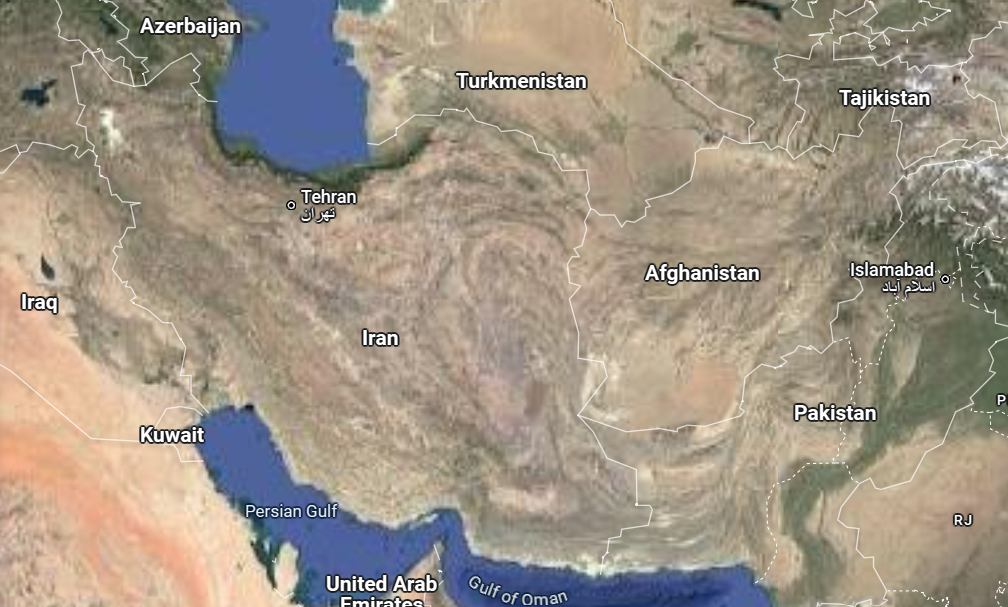

In [ ]:
image_path = "satellite.png"
image = cv2.imread(image_path)
print("Original Image:")
cv2_imshow(image)


> ## **1. Blend Two Images to Create a Composite Image:**

Image blending is the process of combining two images into one. It is commonly used in remote sensing to merge images taken at different times or from different sources.

Blended:


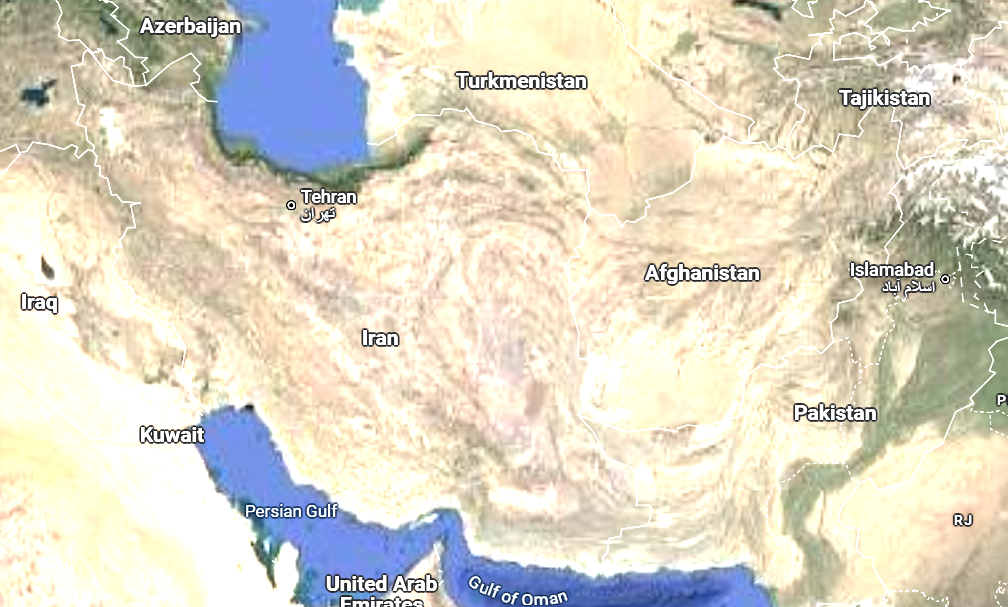

In [ ]:
image = cv2.imread("satellite.png")
image_copy = image.copy()
blended_image = cv2.addWeighted(image, .75, image_copy, .75, 0)
blended_image_rgb = cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB)
print("Blended:")
cv2_imshow(blended_image)

## **Explanation**
* Copies the same image and blends it with itself using cv2.addWeighted() to enhance contrast.
* Converts the blended image to RGB for correct color display and shows it using cv2_imshow().

## **2. Apply a Threshold to Segment Land and Water Regions:**
Thresholding helps to segment different regions in an image. In this case, I threshold the grayscale version of the blended image to distinguish land from water.

Thresholded Image (Land vs Water)


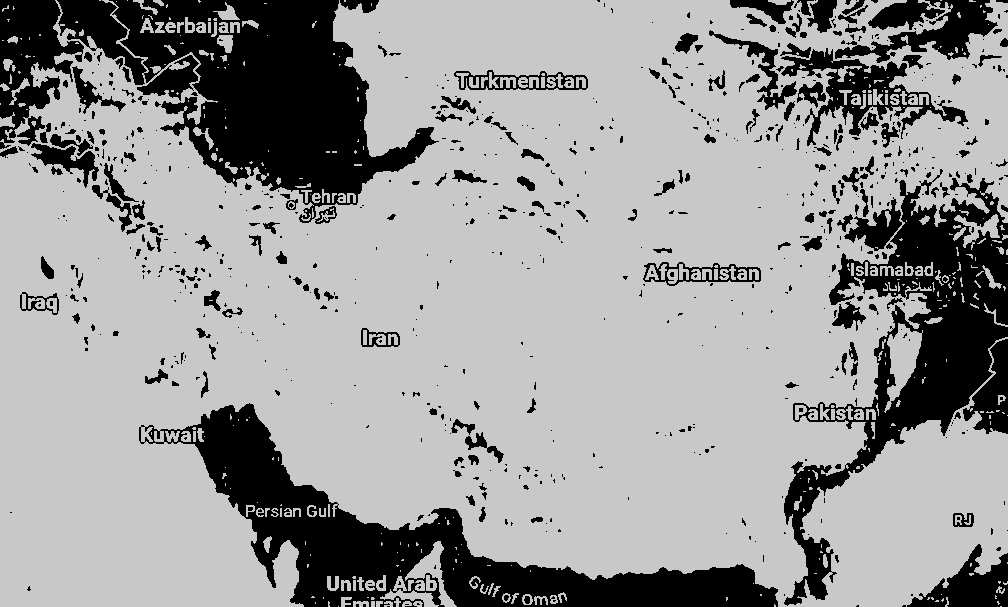

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Apply thresholding (120 is an arbitrary value; tweak for better results)
_, thresh = cv2.threshold(gray, 120, 200, cv2.THRESH_BINARY)
print("Thresholded Image (Land vs Water)")
cv2_imshow(thresh)

## **Use Edge Detection to Identify Region Boundaries:**
 Edge detection is applied to identify the boundaries between land and water regions, helping to outline the distinct regions in the satellite image.

Edge Detection:


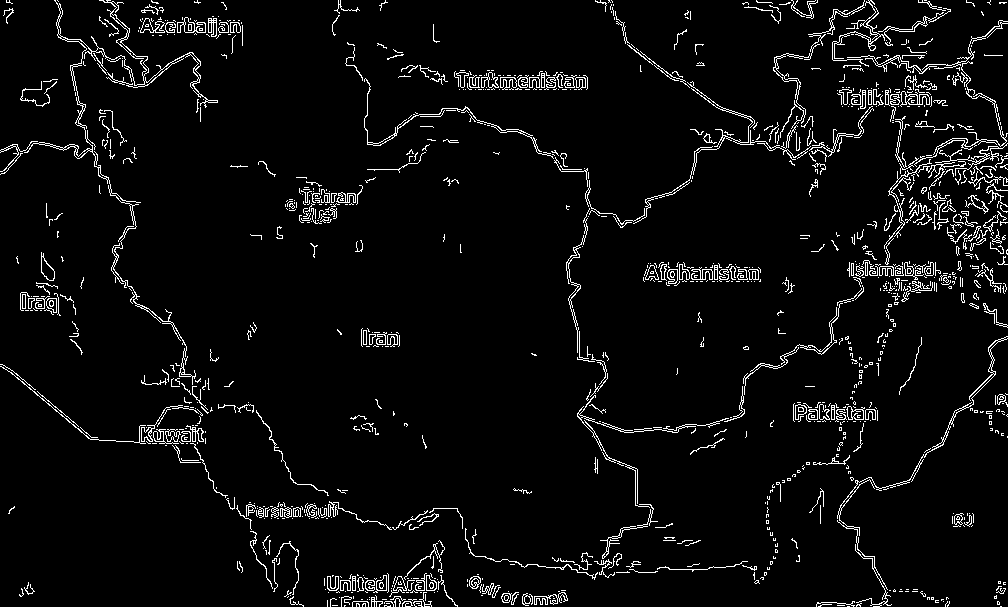

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)  # Threshold values (100, 200) can be adjusted
print("Edge Detection:")
cv2_imshow(edges)


# **Explanation**
* Applies Canny edge detection using cv2.Canny() with threshold values 100 and 200 to detect edges.


## **Create a Mask to Highlight a Specific Region of Interest:**
Masking allows me to focus on specific regions of the image. Here, a mask is created to highlight a particular region, which can be a forested area or a coastal region.

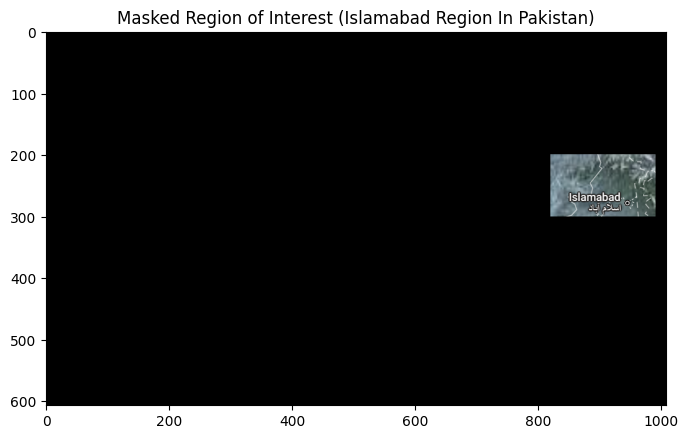

In [ ]:
mask = np.zeros_like(gray)
# Define an ROI using a rectangle (coordinates: top-left (600,100) to bottom-right (990,550))
cv2.rectangle(mask, (820, 200), (990, 300), 255, -1)
masked_image = cv2.bitwise_and(image, image, mask=mask)
plt.figure(figsize=(8, 8))
plt.imshow(masked_image, cmap="gray")
plt.title("Masked Region of Interest (Islamabad Region In Pakistan)")
plt.show()


# **Explanation**
* Applies Canny edge detection using cv2.Canny() with threshold values 100 and 200 to detect edges.




---




> # **Scenario No 03: Smart Surveillance System**
## **Introduction:**

In this scenario, I work on developing a smart surveillance system designed to detect intruders in a restricted area. The task involves processing surveillance images by converting them into binary masks, applying logical operations to remove noise, and detecting motion between consecutive frames to identify potential security threats.

## **Image Load**

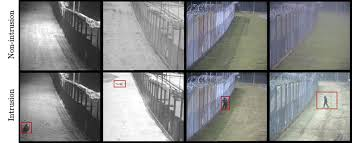

In [ ]:
image = cv2.imread("task 3.jpeg")
cv2_imshow(image)


> ## **1. Convert a Surveillance Image into a Binary Mask Using Thresholding:**

The first step is converting the surveillance image into a binary mask, where areas of interest (e.g., intruders) are highlighted, and the background is discarded.

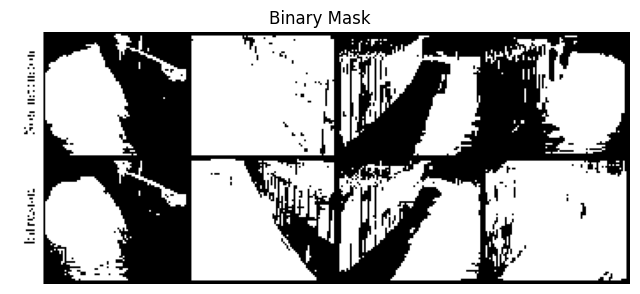

In [ ]:

image = cv2.imread("task 3.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap="gray")
plt.title("Binary Mask")
plt.axis("off")
plt.show()


## **Explanation**
* This step uses thresholding to separate areas with intensity greater than 100 from the background, creating a binary mask.
* Converts the image to grayscale and applies binary thresholding to create a mask.


> ## **2. Apply Logical AND and OR Operations to Filter Noise:**

Logical operations help in refining the binary mask by removing small noise particles through morphological operations such as opening and closing.

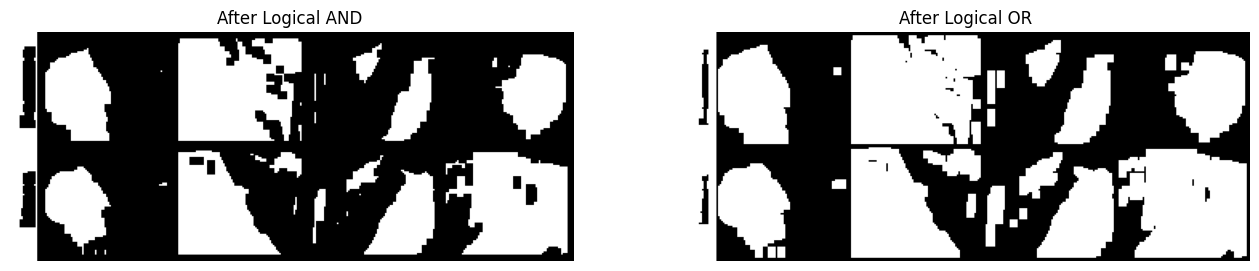

In [ ]:
kernel = np.ones((5, 5), np.uint8)
and_filtered = cv2.erode(binary_mask, kernel, iterations=1)
or_filtered = cv2.dilate(and_filtered, kernel, iterations=1)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(and_filtered, cmap="gray")
plt.title("After Logical AND ")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(or_filtered, cmap="gray")
plt.title("After Logical OR ")
plt.axis("off")

plt.show()


## **Explanation**
* The morphological opening operation removes small noise elements by eroding the image and then dilating it back, helping to preserve the larger features.

* Applies erosion (cv2.erode) to remove small noise (Logical AND effect).
* Applies dilation (cv2.dilate) to restore object size (Logical OR effect) and displays results using Matplotlib.

> ## **3. Use Image Subtraction to Detect Motion Between Two Frames:**

Image subtraction is a powerful technique for detecting motion between two frames. By subtracting one frame from another, I can identify regions that have changed, indicating possible movement.

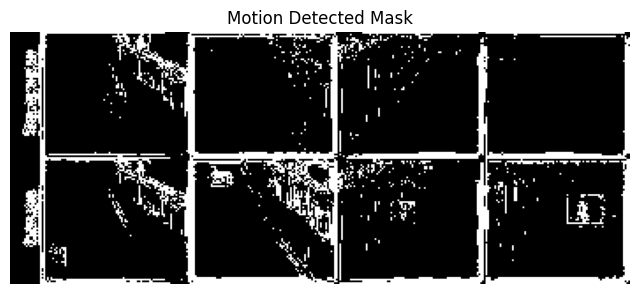

In [ ]:
frame1 = cv2.imread("task 3.jpeg")
frame2 = cv2.imread("task 3.jpeg")
frame2 = cv2.GaussianBlur(frame2, (9, 9), 0)

gray_frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray_frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

motion_detected = cv2.absdiff(gray_frame1, gray_frame2)
_, motion_mask = cv2.threshold(motion_detected, 25, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 8))
plt.imshow(motion_mask, cmap="gray")
plt.title("Motion Detected Mask")
plt.axis("off")
plt.show()


## **Explanation**
* By using absolute difference, I detect the regions that have changed between the two frames, which could indicate motion, potentially identifying an intruder.
* Applies Gaussian blur to the second frame and computes the absolute difference (cv2.absdiff()) between two grayscale images to detect motion.
* Applies binary thresholding to highlight motion areas and displays the motion mask using Matplotlib.



---

